# Multi-Classification_ Written Digits

## content

- **資料前處理**
- [1. Import modules & classes](#import)
- [2. data for Binary Classification](#data)
- [3. Creating feature dataset [X] & labeled data [y]](#feature&label)
- [4. Normalization](#normalization)
- [5. Splitting the training and test datasets](#splitting)
- [6. Setting Confusion Matrix](#confusionMatrix)
- **-------------------------------------------------------------------**
- **演算法**
- [Logistic Regression (邏輯回歸) Algorithm](#LogisticRegression)
- [Multilayer Perceptron (多層感知器, MLP)](#MLP)

<a id= import></a>
## 1. Import modules & classes

In [1]:
import numpy as np  #進行科學計算
import pandas as pd #數據分析工具

#數據可視化
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
#在Jupyter Notebook中嵌入Matplotlib圖表，使得圖表直接在Notebook中顯示而不需要使用 plt.show()。
%matplotlib inline  

#機器學習算法和工具
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

<a id= data></a>
## 2. data for Multi-Classification

+ 8x8 image of a hand-written digits
+ **sklearn.datasets.load_digits** - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html?highlight=digits%20dataset#sklearn.datasets.load_digits

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()  
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

<a id= feature&label></a>
## 3. Creating feature dataset [X] & labeled data [y]

In [3]:
X = pd.DataFrame(digits.data)  # 將feature轉換成dataFrame
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [4]:
y = pd.Series(digits.target)
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Length: 1797, dtype: int32

<a id= normalization></a>
## 4. Normalization

In [8]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [16]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
Xn = minmax_scaler.fit_transform(X)

Xn = pd.DataFrame(Xn)  #轉換
Xn.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.037980,0.325299,0.739740,0.740505,0.361366,0.085142,0.008644,0.002782,0.124617,...,0.232819,0.015881,0.000556,0.031039,0.347350,0.755565,0.738070,0.422753,0.129243,0.022781
std,0.0,0.113399,0.297177,0.265553,0.267962,0.354151,0.207861,0.069159,0.047111,0.199760,...,0.307463,0.075723,0.023590,0.103811,0.318939,0.273418,0.308372,0.368789,0.255659,0.116258
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.062500,0.625000,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.062500,0.687500,0.625000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.250000,0.812500,0.812500,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.062500,0.000000,0.000000,0.000000,0.250000,0.812500,0.875000,0.375000,0.000000,0.000000
75%,0.0,0.000000,0.562500,0.937500,0.937500,0.687500,0.000000,0.000000,0.000000,0.187500,...,0.437500,0.000000,0.000000,0.000000,0.625000,1.000000,1.000000,0.750000,0.125000,0.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id= splitting></a>
## 5. Splitting the training and test datasets

In [17]:
#原始資料集
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,train_size=0.8, test_size=0.2)

#正規化資料集
Xn1, Xn2, yn1, yn2 = train_test_split(Xn, y, random_state=0,train_size=0.8, test_size=0.2)

<a id= confusionMatrix></a>
## 6. Setting Confusion Matrix

In [33]:
def plot_confusion_matrix(mat, matn, suptitle, output=2):
    '''Plot the confusion matrix with heatmap...'''
    plt.figure(1, figsize=(8, 3))
    plt.suptitle(suptitle)
    plt.subplot(121)
    #sns.heatmap(數據集,方格形式,註解,顏色條)
    sns.heatmap(mat, square=True, annot=True, cbar=False)
    plt.title('without Normalization')
    plt.xlim(output,0)
    plt.ylim(0,output)
    plt.xlabel('true value')
    plt.ylabel('predicted value')

    plt.subplot(122)
    sns.heatmap(matn, square=True, annot=True, cbar=False)
    plt.title('with Normalization')
    plt.xlim(output,0)
    plt.ylim(0,output)
    plt.xlabel('true value')
    plt.show()

<a id='LogisticRegression'></a>
## Logistic Regression (邏輯回歸) Algorithm

- About the keyword argument `solver` in LogisticRegression
    - For **binary classification**, setting `liblinear`
    - For **Multi-output classification**, setting `newton-cg`

In [42]:
from sklearn.linear_model import LogisticRegression

#training
logit_model = LogisticRegression(solver='newton-cg').fit(X1, y1)   
logit_n_model = LogisticRegression(solver='newton-cg').fit(Xn1, yn1) 

#predict
y_model = logit_model.predict(X2)    
yn_model = logit_n_model.predict(Xn2) 

#預測結果(準確度)
result_X = accuracy_score(y2, y_model)
result_Xn = accuracy_score(yn2, yn_model)
print('原始資料集準確度：　{:.2f}%'.format(result_X*100))
print('正規化資料集準確度：　{:.2f}%'.format(result_Xn*100))

原始資料集準確度：　95.83%
正規化資料集準確度：　96.11%


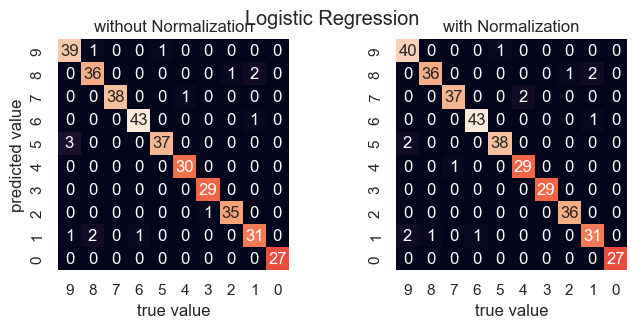

In [43]:
# Compute the confusion matrix...
mat = confusion_matrix(y2, y_model)
matn = confusion_matrix(yn2, yn_model)

# Plot the confusion matrix with heatmap...
plot_confusion_matrix(mat, matn, "Logistic Regression",10)

<a id='MLP'></a>
##  Multilayer Perceptron (多層感知器, MLP)

- About the keyword argument_ -`solver` - in `MLPClassifier`
    - For thousands of training samples or more, using `adam`。一種隨機梯度下降（SGD）優化算法
    - For small datasets, using `lbfgs`
- learning_rate
    - `constant` : 整個訓練過程中使用固定的學習率。
    - `adaptive` : 學習率會根據訓練的進程自動調整。這有助於加速模型收斂。

In [27]:
from sklearn.neural_network import MLPClassifier


#training
mlpc_model = MLPClassifier(hidden_layer_sizes=(500,300), #隱藏層(可多層)
                           solver='adam',             
                           learning_rate='adaptive', 
                           max_iter=2000).fit(X1, y1)   

mlpc_n_model = MLPClassifier(hidden_layer_sizes=(500,300),
                             solver='adam', 
                             learning_rate='adaptive',
                             max_iter=2000).fit(Xn1, yn1) 
    
#predict
y_model = mlpc_model.predict(X2)    
yn_model = mlpc_n_model.predict(Xn2) 

#預測結果(準確度)
result_X = accuracy_score(y2, y_model)
result_Xn = accuracy_score(yn2, yn_model)
print('原始資料集準確度：　{:.2f}%'.format(result_X*100))
print('正規化資料集準確度：　{:.2f}%'.format(result_Xn*100))

原始資料集準確度：　98.33%
正規化資料集準確度：　98.61%


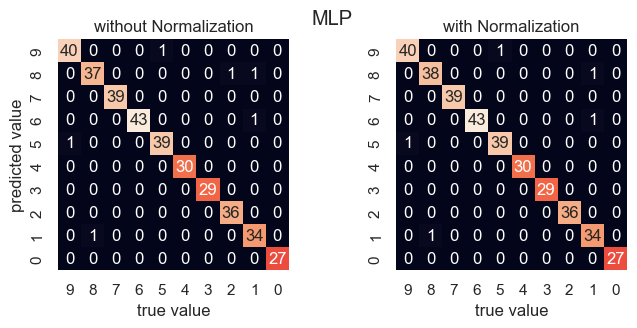

In [30]:
# Compute the confusion matrix...
mat = confusion_matrix(y2, y_model)
matn = confusion_matrix(yn2, yn_model)

# Plot the confusion matrix with heatmap...
plot_confusion_matrix(mat, matn, "MLP",output=10)